In [2]:
import jieba
from gensim.corpora import WikiCorpus
from gensim.models import word2vec
from gensim.models import Word2Vec
# 中文维基百科语料库
# https://dumps.wikimedia.org/zhwiki/latest/zhwiki-latest-pages-articles.xml.bz2

In [2]:
def wiki2txt(in_path,out_path): #将wiki原始文本转化为txt格式
    wiki_corpus = WikiCorpus(in_path, dictionary={})
    num = 0
    with open(out_path, 'w', encoding='utf-8') as output:
        for text in wiki_corpus.get_texts():  # get_texts() 将 wiki的一篇文章转为text的一行
            output.write(' '.join(text) + '\n')
            num += 1
            if num == 1000:
                break

In [7]:
wiki2txt(in_path='E:/Teaching/数据挖掘与最优化/Data/zhwiki-latest-pages-articles.xml.bz2',out_path='E:/Teaching/数据挖掘与最优化/Data/wiki_text.txt')

In [4]:
# 安装OpenCC，将繁体转化为简体
# pip install OpenCC
from opencc import OpenCC
# 繁体到简体: 't2s'
cc = OpenCC('t2s')
cc.convert("中文簡繁轉換開源項目，支持詞彙級別的轉換、異體字轉換和地區習慣用詞轉換（中國大陸、臺灣、香港、日本新字體）。不提供普通話與粵語的轉換。") 

'中文简繁转换开源项目，支持词汇级别的转换、异体字转换和地区习惯用词转换（中国大陆、台湾、香港、日本新字体）。不提供普通话与粤语的转换。'

In [6]:
def jieba_cut(in_path,out_path):
    output = open(out_path, 'w', encoding='utf-8')
    with open(in_path, 'r', encoding='utf-8') as content:
        for texts_num, line in enumerate(content):  # enumerate 给 line前加序号
            line = line.strip('\n')
            line = cc.convert(line)
            words = jieba.cut(line, cut_all=False)
            for word in words:
                output.write(word + ' ')
            output.write('\n')
    output.close()

In [8]:
jieba_cut(in_path='E:/Teaching/数据挖掘与最优化/Data/wiki_text.txt',out_path='E:/Teaching/数据挖掘与最优化/Data/wiki.txt')

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\LIUYAN~1\AppData\Local\Temp\jieba.cache
Loading model cost 0.704 seconds.
Prefix dict has been built successfully.


In [10]:
# LineSentence自动将文本文件处理成句子式数据
sentences = word2vec.LineSentence('E:/Teaching/数据挖掘与最优化/Data/wiki.txt') 

In [12]:
# window: 窗口大小
# vector_size： 词向量的维度
# sg: 模型的训练算法: 1: skip-gram; 0: CBOW
# min_count：低频次阈值。滤除未超过此频次的词
# cbow_mean: 0：使用上下文单词向量的总和; 1: 使用均值，适用于CBOW
# workers： 训练模型时使用的线程数
model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4, sg=0, cbow_mean=0)

In [14]:
# 保存训练好的模型
model.save('E:/Teaching/数据挖掘与最优化/Code/wiki.model')
# 导入之前训练好的模型
# model = Word2Vec.load("E:/Teaching/数据挖掘与最优化/Code/wiki.model")

In [16]:
# 单词数量
len(model.wv.key_to_index)

185901

In [18]:
# 某个单词对应的词向量
model.wv.word_vec("历史")

C:\Users\Liu Yang\AppData\Local\Temp\ipykernel_3148\1785541489.py:2: DeprecationWarning: Call to deprecated `word_vec` (Use get_vector instead).
  model.wv.word_vec("历史")


array([-0.46822077,  0.01304112,  0.08762813, -0.08348284,  0.02369233,
        0.06327277,  0.07560752,  0.38039652, -0.45035884, -0.4050934 ,
       -0.0048076 , -0.7736181 , -0.8597421 ,  0.18009625,  0.39622533,
       -0.00932433, -0.12781055, -0.36281818, -0.30924332, -0.60836136,
        0.1273147 ,  0.5587347 ,  0.2835574 , -0.15587051, -0.17885938,
       -0.39826563, -0.32592028, -0.107078  , -0.60363495, -0.01338803,
       -0.20267019,  0.15076765,  0.12113513, -0.46058062, -0.43246248,
       -0.06423352, -0.2430806 , -0.49464002, -0.19824359, -0.30638367,
        0.13006338, -0.32554492, -0.14134122, -0.08862392, -0.03442799,
       -0.11902287, -0.11505379,  0.14414825, -0.17808585,  0.34654748,
       -0.03935786, -0.3129341 ,  0.23220065, -0.15992527, -0.04331738,
        0.05455007,  0.0734014 ,  0.03633448, -0.02482835,  0.1275691 ,
        0.1543513 ,  0.549653  , -0.40721944, -0.14877649, -0.25669697,
        0.42824006, -0.35780397,  0.5855839 , -0.47415182, -0.02

In [20]:
# 单词和单词之间的相似度
print(model.wv.similarity('猫', '狗'))

0.9120362


In [22]:
# 模型测试-相似度计算
test_words = ["中国", "数学", "苹果"]
for i in range(len(test_words)):
    res = model.wv.most_similar(test_words[i],topn=5)
    print(test_words[i])
    print(res)

中国
[('香港', 0.8069507479667664), ('台湾', 0.7988131046295166), ('韩国', 0.762339174747467), ('连续剧', 0.7539936900138855), ('霸王', 0.7529170513153076)]
数学
[('天文学', 0.972315788269043), ('物理', 0.9661376476287842), ('物理学', 0.9654505848884583), ('理论', 0.965279757976532), ('形而上学', 0.9611111879348755)]
苹果
[('机', 0.9709410667419434), ('石头', 0.9702107906341553), ('羊肉', 0.965071439743042), ('酥', 0.9649410247802734), ('八卦掌', 0.9630110859870911)]


In [24]:
# 返回不合群单词
model.wv.doesnt_match("孔明 张飞 关公 武松 张辽".split())

'武松'

In [26]:
# 词向量的可视化
words = ["语言", "数学", "苹果", "领域", "方法", "桥梁", "世界", "王朝", "军官", "选举", "透明", "香港", "猫", "狗", "篮球"]
vec_words = [] #保存词向量
for word in words: #遍历词向量
    vec_words.append(model.wv.word_vec(word))

C:\Users\Liu Yang\AppData\Local\Temp\ipykernel_3148\3794928021.py:5: DeprecationWarning: Call to deprecated `word_vec` (Use get_vector instead).
  vec_words.append(model.wv.word_vec(word))


D:\Program Files\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) SimHei.
  fig.canvas.print_figure(bytes_io, **kw)


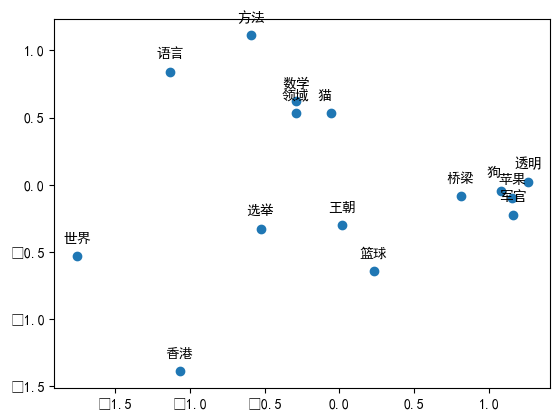

In [30]:
# 导入主成分分析包
from sklearn.decomposition import PCA
# 创建PCA模型
pca = PCA(n_components=2)
# 将100维词向量降低到两维
vec_2 = pca.fit_transform(vec_words)

# 导入绘图包
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
plt.scatter(vec_2[:,0],vec_2[:,1])
for i in range(len(words)):
    plt.annotate(words[i], #点的标签文本
                 xy=(vec_2[i,0],vec_2[i,1]), #点的坐标
                 xytext=(-10,10), #标签文本的坐标
                 textcoords="offset points")
plt.show()